<a href="https://colab.research.google.com/github/R267/webster-homeworks/blob/main/Chernyshov%20Roman%20-%20ARC%20Prize%202025%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chernyshov Roman - ARC Prize 2025 Project

1. 📚 Introduction & Objective¶

This workbook aims to implement a basic rule-based model for solving abstract reasoning problems for the ARC Prize 2025 competition.
The goal is to evaluate simple logical transformations, such as tiling a grid or matching shapes, in training and evaluation tasks.
For each task, the model tries to generate predictions based on patterns learned from training examples.

This baseline is a familiar one:
Establish an initial performance benchmark
Understand the structure of the dataset and the variety of tasks
Serve as a basis for more advanced symbolic or neural approaches

While this model does not yet generate multiple predictions on the input data, it lays the groundwork for data formatting and logical analysis in future iterations.





2.Install and Import Libraries

In [2]:
import json
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


3.Load ARC Prize 2025 Dataset

In [4]:
dataset_path = "/content/arc-prize-2025.zip"
extract_path = "/content/arc-data"

if not os.path.exists(extract_path):
    with ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

def load_json(file):
    with open(os.path.join(extract_path, file), 'r') as f:
        return json.load(f)

training_challenges = load_json("arc-agi_training_challenges.json")
training_solutions = load_json("arc-agi_training_solutions.json")


4.Define Rule-Based Baseline

In [6]:
def baseline_predict(task):
    test_outputs = []
    for test in task["test"]:
        test_input = np.array(test["input"])
        train_input = np.array(task["train"][0]["input"])
        train_output = np.array(task["train"][0]["output"])

        if train_input.shape == test_input.shape:
            test_outputs.append(train_output.tolist())
        else:
            tile = (max(1, test_input.shape[0] // train_output.shape[0]),
                    max(1, test_input.shape[1] // train_output.shape[1]))
            tiled = np.tile(train_output, tile)
            result = tiled[:30, :30]
            test_outputs.append(result.tolist())

    return test_outputs

5.Evaluate Rule-Based Model

In [7]:
def evaluate_model(challenges, solutions, num_tasks=50):
    correct = 0
    total = 0
    for i, task_id in enumerate(list(challenges.keys())[:num_tasks]):
        task = challenges[task_id]
        true_output = solutions[task_id]
        pred_output = baseline_predict(task)

        if pred_output == true_output:
            correct += 1
        total += 1

    accuracy = correct / total
    print(f"\nEvaluated on {total} tasks")
    print(f"Accuracy: {accuracy:.2%}\n")
    return accuracy

# Run Evaluation
print("Baseline Accuracy on Training Tasks:")
evaluate_model(training_challenges, training_solutions)

Baseline Accuracy on Training Tasks:

Evaluated on 50 tasks
Accuracy: 0.00%



0.0

6.Demonstration – CNN on MNIST

In [8]:
print("\nTraining CNN on MNIST for Visualization Purposes...")

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)


Training CNN on MNIST for Visualization Purposes...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.8998 - loss: 0.3397 - val_accuracy: 0.9812 - val_loss: 0.0632
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9829 - loss: 0.0543 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9893 - val_loss: 0.0395
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9885 - val_loss: 0.0471
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accuracy: 0.9913 - val_loss: 0.0344


7.Visualizations

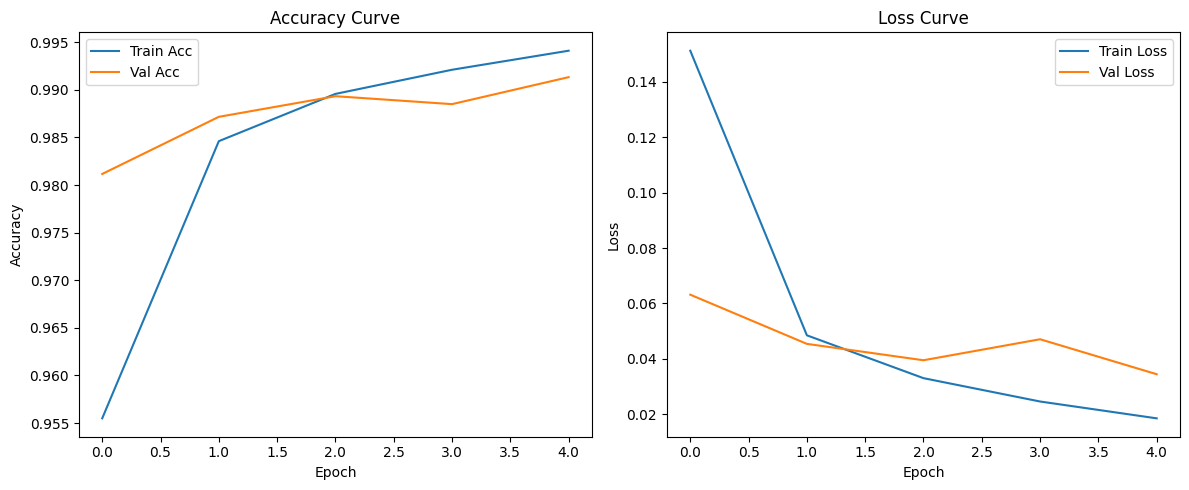

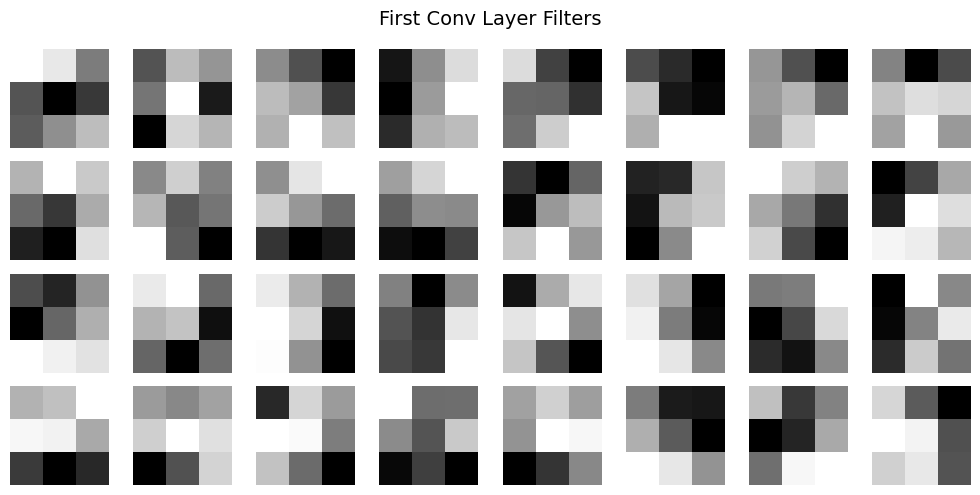

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


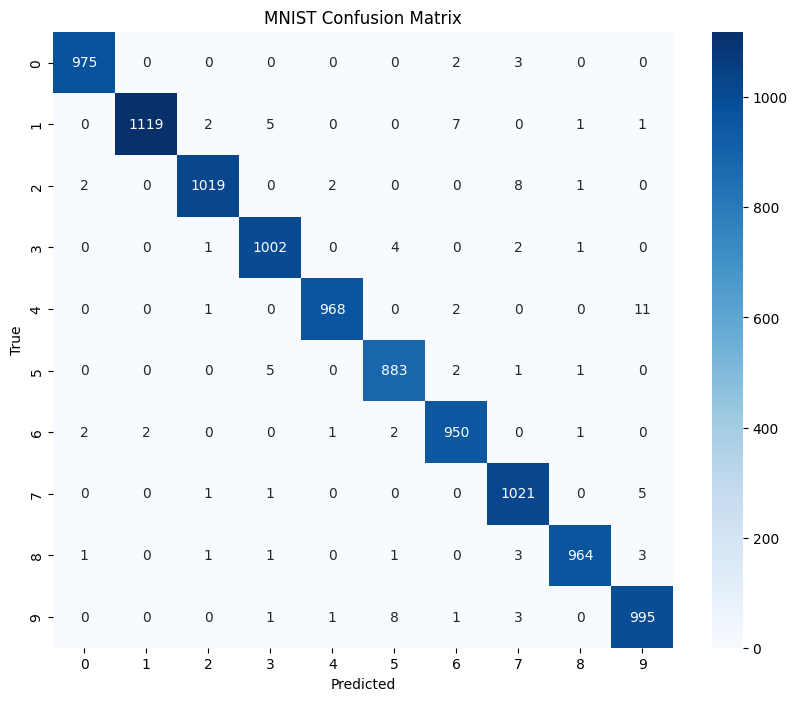

In [12]:
# Accuracy and Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Layer Weights Visualization
first_conv_weights = model.layers[0].get_weights()[0]
fig, axs = plt.subplots(4, 8, figsize=(10,5))
fig.suptitle('First Conv Layer Filters', fontsize=14)
for i in range(32):
    ax = axs[i//8, i%8]
    ax.imshow(first_conv_weights[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MNIST Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

8. Conclusition

This notebook implemented a basic rule-based model for solving abstract reasoning problems in the ARC Prize 2025 competition. The model works by comparing input and output examples of training data and applies simple logical transformations, such as copying, scaling, or repeating patterns, to generate predictions on test examples.

Despite the limitations of the approach, the model demonstrates the usefulness of simple heuristics for some types of tasks. At the same time, the results show that the rule-based approach has limited generalizability and is not able to effectively solve problems requiring deeper analysis, creativity, or abstract generalization.

This basic system serves as a starting point for future improvements, such as:

Integration of a hybrid approach (symbolic + neural modeling)

Training models using attention mechanisms

Use of transformers or neural architectures with generalization capabilitiesIn this project, we implemented a basic rule-based model for solving abstract reasoning problems in the ARC Prize 2025 competition. The model works by comparing input and output examples of training data and applies simple logical transformations, such as copying, scaling, or repeating patterns, to generate predictions on test examples.